# SIMPLE LINEAR REGRESSION

## UNDERSTANDING THE DATA(salary prediction)

In [1]:
import pandas as pd
df=pd.read_csv(r'C:\Users\Admin\Downloads\Salary_dataset.csv')
df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [2]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [3]:
df.tail()

,Unnamed: 0,YearsExperience,Salary
25,25,9.1,105583.0
26,26,9.6,116970.0
27,27,9.7,112636.0
28,28,10.4,122392.0
29,29,10.6,121873.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [5]:
df.shape

(30, 3)

In [6]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


# Visualising Data Using Plot

<Axes: xlabel='YearsExperience', ylabel='Salary'>

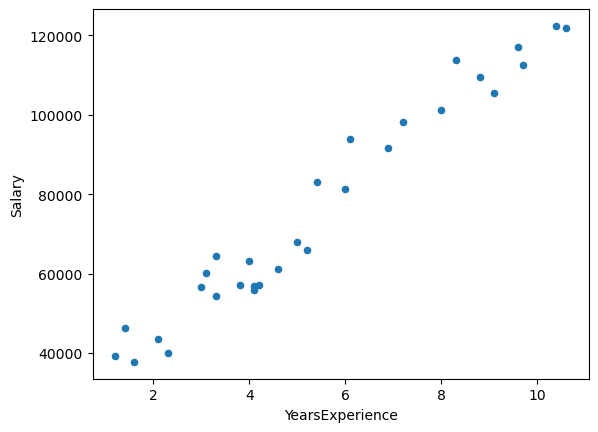

In [8]:
df.plot(x="YearsExperience",y="Salary",kind="scatter")

In [9]:
X=df["YearsExperience"]
X.head()

0    1.2
1    1.4
2    1.6
3    2.1
4    2.3
Name: YearsExperience, dtype: float64

In [11]:
Y=df["Salary"]
Y.head()

0    39344.0
1    46206.0
2    37732.0
3    43526.0
4    39892.0
Name: Salary, dtype: float64

# Splitting data into Training and Testing Data¶

In [12]:
#random_state is the seed used by the random number generator, it can be any integer.
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split (X,Y,train_size=0.8, random_state=0000)

In [13]:
print(type(X_train))
print(type(Y_train))
print(type(X_test))
print(type(Y_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [14]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(24,)
(24,)
(6,)
(6,)


In [15]:
import numpy as np
X_train=np.array(X_train)[:,np.newaxis]
X_test=np.array(X_test)[:,np.newaxis]

In [16]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(24, 1)
(24,)
(6, 1)
(6,)


# Performing Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,Y_train)


LinearRegression()

# Coefficient Calculation

In [18]:
print(lr.intercept_)
print(lr.coef_)

25849.84163795526
[9312.57512673]


# Prediction

In [20]:
Y_pred=lr.predict(X_test)

In [21]:
type(Y_pred)

numpy.ndarray

In [22]:
Y_test.shape

(6,)

Text(0, 0.5, 'Sales')

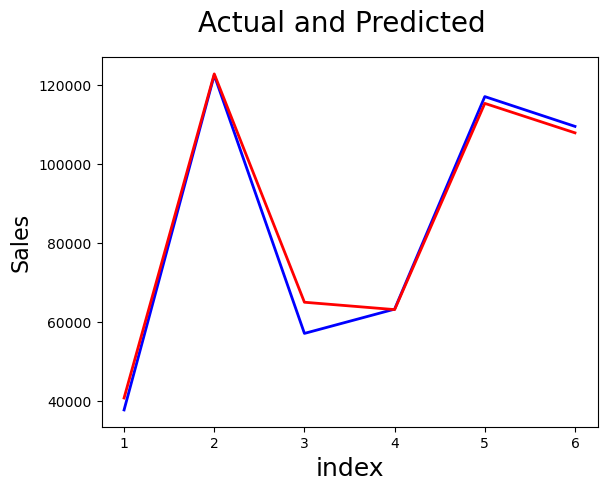

In [24]:
import matplotlib.pyplot as plt
c=[i for i in range(1,7,1)]   #generating index
fig=plt.figure()
plt.plot(c,Y_test,color="blue",linewidth=2,linestyle="-")
plt.plot(c,Y_pred,color="red",linewidth=2,linestyle="-")
fig.suptitle('Actual and Predicted',fontsize=20)         #plot heading
plt.xlabel('index',fontsize=18)         # X label
plt.ylabel('Sales',fontsize=16)         # Y label

Text(0, 0.5, 'Ytest-Ypred')

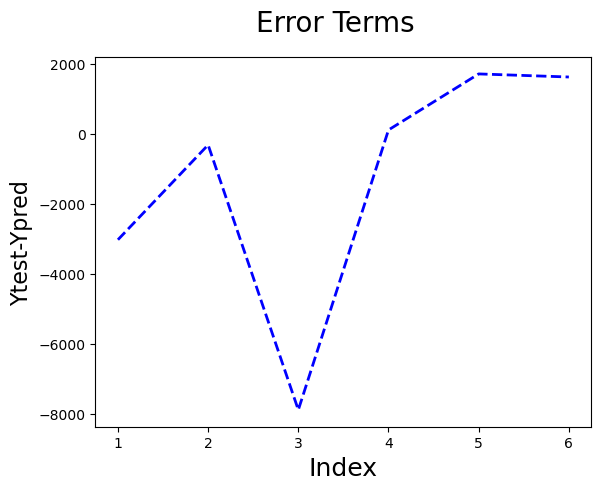

In [25]:
# Error terms
c = [i for i in range(1,7,1)]
fig = plt.figure()
plt.plot(c,Y_test-Y_pred, color="blue", linewidth=2, linestyle="--")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Ytest-Ypred', fontsize=16)                # Y-label

In [26]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(Y_test,Y_pred)

In [28]:
r_squared = r2_score(Y_test,Y_pred)

In [29]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 12823412.298126565
r_square_value : 0.988169515729126


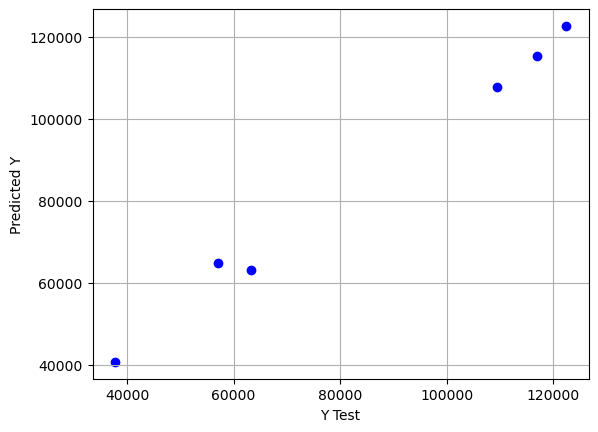

In [30]:
import matplotlib.pyplot as plt
plt.scatter(Y_test,Y_pred,c='blue')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.grid()